<a href="https://www.kaggle.com/code/shenoudasafwat/laptop-battery-health-predictor?scriptVersionId=287062697" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📌 Cell 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# 📌 Cell 2: Load Dataset

In [2]:
df = pd.read_csv('/kaggle/input/laptop-battery-health-and-usage-dataset/laptop_battery_health_usage.csv')
df.head()

,device_id,brand,model_year,os,usage_type,daily_usage_hours,charging_cycles,avg_charge_limit_percent,battery_health_percent,battery_age_months,overheating_issues,performance_rating
0,LB001,HP,2021,Windows,Office,6,420,90,86,36,No,4
1,LB002,Dell,2020,Windows,Programming,8,610,100,78,48,Yes,3
2,LB003,Apple,2022,macOS,Creative,7,310,85,92,24,No,5
3,LB004,Lenovo,2019,Windows,Student,5,700,100,70,60,Yes,3
4,LB005,Asus,2021,Windows,Gaming,9,820,100,65,40,Yes,2


# 📌 Cell 3: Dataset Overview

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   device_id                 50 non-null     object
 1   brand                     50 non-null     object
 2   model_year                50 non-null     int64 
 3   os                        50 non-null     object
 4   usage_type                50 non-null     object
 5   daily_usage_hours         50 non-null     int64 
 6   charging_cycles           50 non-null     int64 
 7   avg_charge_limit_percent  50 non-null     int64 
 8   battery_health_percent    50 non-null     int64 
 9   battery_age_months        50 non-null     int64 
 10  overheating_issues        50 non-null     object
 11  performance_rating        50 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ KB


,model_year,daily_usage_hours,charging_cycles,avg_charge_limit_percent,battery_health_percent,battery_age_months,performance_rating
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,2020.560000,6.600000,526.400000,92.100000,80.16000,42.240000,3.580000
std,1.567007,1.498298,220.405563,6.857887,11.83278,18.118161,1.144463
min,2018.000000,4.000000,180.000000,80.000000,55.00000,12.000000,1.000000
25%,2019.250000,6.000000,342.500000,85.000000,72.50000,25.500000,3.000000
50%,2021.000000,6.000000,495.000000,90.000000,82.50000,38.000000,4.000000
75%,2022.000000,8.000000,695.000000,100.000000,90.00000,58.500000,4.750000
max,2023.000000,10.000000,950.000000,100.000000,98.00000,72.000000,5.000000


# 📌 Cell 4: Missing Values Check

In [4]:
df.isnull().sum()

device_id                   0
brand                       0
model_year                  0
os                          0
usage_type                  0
daily_usage_hours           0
charging_cycles             0
avg_charge_limit_percent    0
battery_health_percent      0
battery_age_months          0
overheating_issues          0
performance_rating          0
dtype: int64

# 📌 Cell 5: Target Variable Distribution (Battery Health)

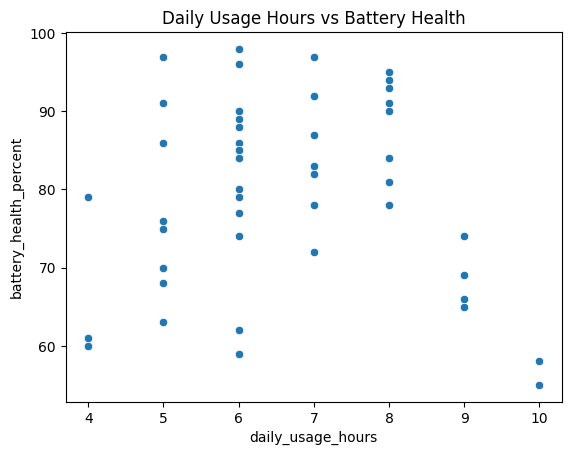

In [5]:
plt.figure()
sns.scatterplot(x='daily_usage_hours', y='battery_health_percent', data=df)
plt.title('Daily Usage Hours vs Battery Health')
plt.show()

# 📌 Cell 6: Usage Pattern Analysis

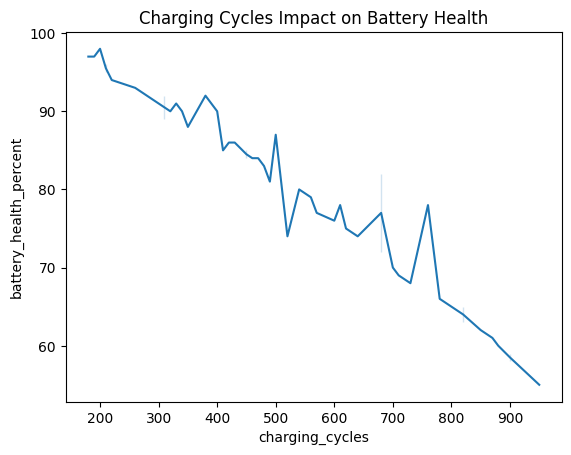

In [6]:
plt.figure()
sns.lineplot(x='charging_cycles', y='battery_health_percent', data=df)
plt.title('Charging Cycles Impact on Battery Health')
plt.show()

# 📌 Cell 7: Charging Cycles Impact

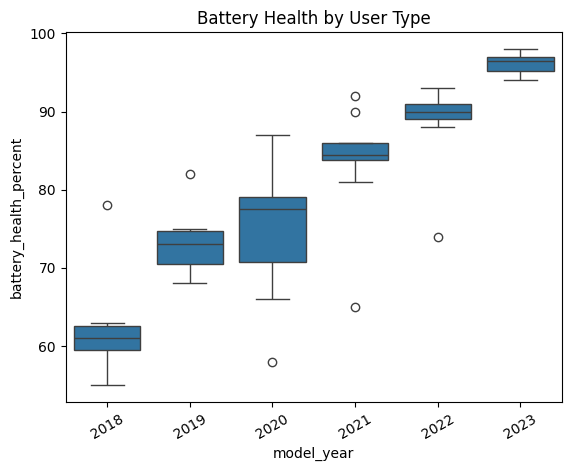

In [7]:
plt.figure()
sns.boxplot(x='model_year', y='battery_health_percent', data=df)
plt.xticks(rotation=30)
plt.title('Battery Health by User Type')
plt.show()

# 📌 Cell 9: Correlation Heatmap

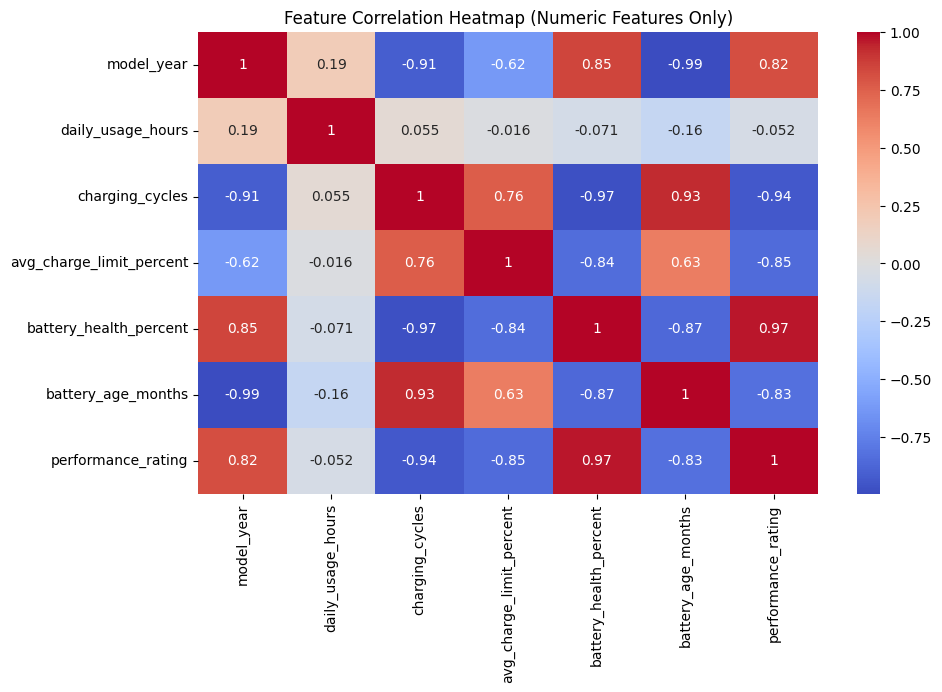

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap (Numeric Features Only)')
plt.show()

# 📌 Cell 10: Choose features

In [9]:
features = [
    'charging_cycles',
    'battery_age_months',
    'avg_charge_limit_percent',
    'daily_usage_hours'
]

X = df[features]                 
y = df['battery_health_percent']  
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()


X shape: (50, 4)
y shape: (50,)


,charging_cycles,battery_age_months,avg_charge_limit_percent,daily_usage_hours
0,420,36,90,6
1,610,48,100,8
2,310,24,85,7
3,700,60,100,5
4,820,40,100,9


# 📌 Cell 11: Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

# 📌 Cell 12: Regression Model (Battery Health Prediction)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 📌 Cell 13: Model Evaluation

In [12]:
y_pred = model.predict(X_test)


print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

MSE: 1.635285453088151
R2 Score: 0.9852157539726232


# 📌 Cell 14: Actual vs Predicted Visualization

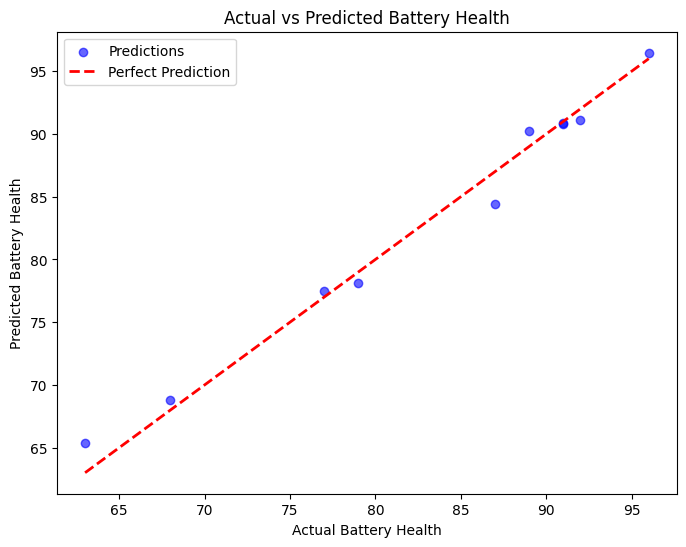

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Battery Health')
plt.ylabel('Predicted Battery Health')
plt.title('Actual vs Predicted Battery Health')
plt.legend()
plt.show()


# 📌 Cell 16: the important features 

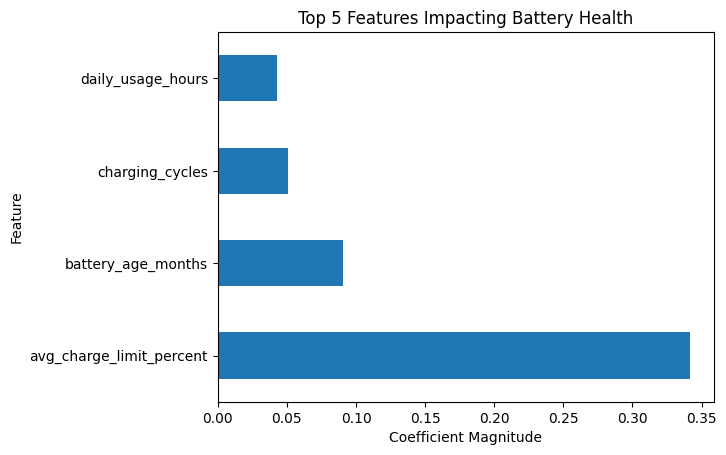

Top 5 Features:
 avg_charge_limit_percent    0.341742
battery_age_months          0.090497
charging_cycles             0.050702
daily_usage_hours           0.042786
dtype: float64


In [14]:
importance = pd.Series(model.coef_, index=X.columns)
top_features = importance.abs().sort_values(ascending=False).head(5)
top_features.plot(kind='barh', title='Top 5 Features Impacting Battery Health')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

print("Top 5 Features:\n", top_features)


# [Shenouda Safwat](https://www.linkedin.com/in/shenouda-safwat/)